# Loading Libraries and Modules

In [62]:
import pandas as pd
import os
import numpy as np
import hvplot.pandas
from pathlib import Path
from bokeh.models.formatters import DatetimeTickFormatter

%matplotlib inline

from qualifier.utils.fileio import (
    read_housing_inventory_data,
    read_rental_inventory,
    read_building_completion_data,
    read_building_permits_data,
    read_labor_data,
    read_employment_data,
    read_monthly_housing_permits_data,
    read_geo_codes,
)

# Loading, Cleaning and Reshaping Data

### Reading Cleaned Monthly House Listing Data

In [69]:
wa_house_listing_county_df = read_housing_inventory_data()
#wa_house_listing_county_df.head()

### Reading Monthly Rental Data County and City wise.

In [70]:
rental_df = read_rental_inventory()
rental_county_df = rental_df[0]
rental_city_df = rental_df[1]

#display(rental_county_df.head(2))
#display(rental_city_df.head(2))

### Reading Annual Building Completion Data County and Citywise.

In [71]:
building_completion_df = read_building_completion_data()
building_completion_county_df = building_completion_df[0]
building_completion_city_df = building_completion_df[1]

# Displaying the transformed Building Units DataFrames.
#display(building_completion_county_df.head(2))
#display(building_completion_city_df.head(2))

### Reading Annual Building Permits Data County and Citywise.

In [72]:
building_permit_df = read_building_permits_data()
building_permit_county_df = building_permit_df[0]
building_permit_city_df = building_permit_df[1]

# Displaying the transformed Building Unit Permits DataFrames.
#display(building_permit_county_df.head(2))
#display(building_permit_city_df.head(2))

### Reading Monthly Building Permits Data Countywise.

In [74]:
monthly_housing_permits_data = read_monthly_housing_permits_data()
#monthly_housing_permits_data.head()

### Reading Monthly Labor and Employment Data Countywise.

In [75]:
# Reading Countywise Labor Force Data From `wa_labor_force_by_county.csv` 
wa_labor_force_df = read_labor_data()

# Reading Countywise Labor Force Data From `wa_employment_by_county.csv`
wa_employment_df = read_employment_data()

#display(wa_labor_force_df.head(2))
#display(wa_employment_df.head(2))

### Reading Geocodes

In [43]:
geocode_df = read_geo_codes()

# Interactive Data Exploration

## Prices, Rents, and Affordability

### Average Rent by City 

In [76]:
#Plotting the visualization for city wise 
rental_city_df.hvplot(
    title='Rental Growth from 2017 to 2021',
    x='Date',
    y='Average_Rental_Price',
    widget_location='left_top',
    kind='line',
    groupby='City_Name',
    grid=True
)

Row
    [0] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='City_Name', options=['Auburn', 'Bellevue', ...], value='Auburn', width=250)
        [1] VSpacer()
    [1] HoloViews(DynamicMap, widget_location='left_top')

### Average Rent by County

In [77]:
#Plotting the visualization for county wise
rental_county_df.hvplot(
    title='Rental Growth from 2017 to 2021',
    x='Date',
    y='Average_Rental_Price',
    widget_location='left_top',
    kind='line',
    groupby='County_Name',
    grid=True
)

Row
    [0] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='County_Name', options=['Clark', 'Grant', ...], value='Clark', width=250)
        [1] VSpacer()
    [1] HoloViews(DynamicMap, widget_location='left_top')

### Average House Listing Price by County

In [78]:
#Create a bar plot of the average listing price by date grouped by the county
# formatter = DatetimeTickFormatter(months='%b %Y')
formatter = DatetimeTickFormatter(months='%Y-%m')

wa_house_listing_county_df.hvplot.bar(
    x='Date',
    y='average_listing_price',
    groupby='county_name',
    title='Average Listing Price by Date',
    rot=90).opts(yformatter=formatter)

:DynamicMap   [county_name]
   :Bars   [Date]   (average_listing_price)

In [79]:
#Create a bar plot of the average listing price by county
wa_house_listing_county_df.hvplot.bar(
    x='county_name',
    y='average_listing_price',
    groupby='Date',
    title='Average Listing Price by County',
    rot=50).opts(yformatter='%.0f')

:DynamicMap   [Date]
   :Bars   [county_name]   (average_listing_price)

### Affordability by City

In [80]:
#Reading the csv file into dataframe
city_affordability_indices = pd.read_csv(
    Path("Resources/CityAffordabilityIndices.csv"),
    index_col='Areas',
)

#Displaying the dataframe
city_affordability_indices.head()

,2017,2018,2019,2020
Areas,,,,
Aberdeen,193.3,141.5,143.7,157.3
Airway Heights,137.5,115.0,118.0,117.3
Anacortes,83.6,72.0,81.5,75.9
Arlington,113.0,102.4,112.1,107.1
Auburn,99.1,90.6,97.6,104.1


In [81]:
#Plotting the whole dataframe only for 2017 for analysis
city_affordability_indices['2020'].hvplot.bar(
    legend=True,
    width=1200,
    height=700,
    title='City Affordability Index - 2017',
    color="brown",
    ylabel= "Index",
    xlabel= "Cities",
    rot=45
)

:Bars   [Areas]   (2020)

## Construction: Building Permits and Completions

### Annual Building Completions by City

In [82]:
#Create a bar plot of the units completed by the city 
building_completion_city_df.hvplot.bar(
    x='Date',
    y='Units_Completed',
    groupby='CITIES',
    title='City Units Completed by Year',
    rot=30
).opts(yformatter='%.0f')

:DynamicMap   [CITIES]
   :Bars   [Date]   (Units_Completed)

### Annual Building Completions by County

In [83]:
#Create a bar plot of the units completed by the county 
building_completion_county_df.hvplot.bar(
    x='Date',
    ylabel='Units Completed',
    groupby='COUNTIES',
    title='County Units Completed by Year',
    rot=30,
    color='Brown'
).opts(yformatter='%.0f')

:DynamicMap   [COUNTIES]
   :Bars   [Date]   (Units_Completed)

### Annual Building Permits by City

In [111]:
#Creating a bar plot of the building permits for the county
building_permit_city_df.hvplot.bar(
    x='Date',
    y='Units_Permitted',
    groupby='CITIES',
    title='City Units Permitted by Date',
    rot=30,
    color='pink'
).opts(yformatter='%.0f')

:DynamicMap   [CITIES]
   :Bars   [Date]   (Units_Permitted)

### Annual Building Permits by County

In [112]:
#Creating a bar plot of the building permits for the county
building_permit_county_df.hvplot.bar(
    x='Date',
    y='Units_Permitted',
    groupby='COUNTIES',
    title='County Units Permitted by Date',
    rot=30
).opts(yformatter='%.0f')

:DynamicMap   [COUNTIES]
   :Bars   [Date]   (Units_Permitted)

## Housing Demand: Employment and Labor Force Growth

### Monthly Labor Force by County

In [113]:
#Create a line plot to show the labor force by county
wa_labor_force_df.hvplot(
    x='Date',
    y='LABOR_NO.',
    groupby='FIPS_CODE',
    title='Washington Labor Force by Date',
    rot=30
).opts(yformatter='%.0f')

:DynamicMap   [FIPS_CODE]
   :Curve   [Date]   (LABOR_NO.)

### Monthly Employment by County

In [114]:
#Create a line plot to show the employment rate by county
wa_employment_df.hvplot(
    x='Date',
    y='EMP_NO.',
    groupby='FIPS_CODE',
    title='Employment by Month: Jan 2017 - Dec 2021',
    rot=30
).opts(yformatter='%.0f')

:DynamicMap   [FIPS_CODE]
   :Curve   [Date]   (EMP_NO.)

# Analysis of Washington Housing Markets

## Rent Growth Analysis

### Rent Growth by City

In [88]:
#Formatting table and slicing dataframe to only few cities for further analysis
sliced_city_rental_df = pd.pivot_table(rental_city_df,values='Average_Rental_Price',
                      index=['Date'],
                      columns=['City_Name'])
sliced_city_rental_df = sliced_city_rental_df[['Seattle','Bellevue','Bothell','Everett','Kirkland','Issaquah']]

#Displaying sliced dataframe
display(sliced_city_rental_df.head())

City_Name,Seattle,Bellevue,Bothell,Everett,Kirkland,Issaquah
Date,,,,,,
2017-01-01,1681.0,2063.0,1624.0,1223.0,1888.0,2065.0
2017-02-01,1713.0,2099.0,1643.0,1220.0,1930.0,2094.0
2017-03-01,1742.0,2158.0,1728.0,1252.0,1972.0,2106.0
2017-04-01,1773.0,2201.0,1787.0,1262.0,2029.0,2161.0
2017-05-01,1814.0,2224.0,1854.0,1292.0,2082.0,2242.0


<AxesSubplot:title={'center':'Rental growth city wise from 2017 to 2021'}, xlabel='Year', ylabel='Average Rental Price'>

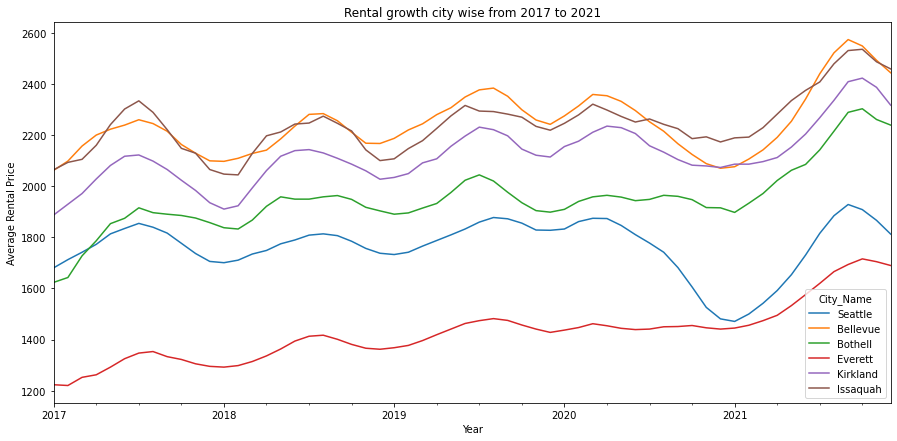

In [89]:
#Plotting the sliced dataframe for visualization 
sliced_city_rental_df.plot(
    figsize=(15,7),
    title = "Rental growth city wise from 2017 to 2021",
    xlabel='Year',
    ylabel='Average Rental Price'
)

##### Based on the city wise analysis, it is clearly noticeable that the rents of the prime cities like Seattle, Kirkland, Bellevue have been on upward trend along with suburbs area like Bothell, Issaquah, Everett, as compared to pre-covid timeline during pandemic. Rents declined in most cities during 2020 as the dramatic loss in jobs reduced household formation and demand for rental housing.

### Rent Growth by County

In [116]:
#Formatting table and slicing dataframe to only 3 counties for further analysis
sliced_county_rental_df = pd.pivot_table(rental_county_df,values='Average_Rental_Price',
                      index=['Date'],
                      columns=['County_Name'])
sliced_county_rental_df = sliced_county_rental_df[['King','Snohomish','Pierce']]

#Displaying sliced dataframe
display(sliced_county_rental_df.head())

County_Name,King,Snohomish,Pierce
Date,,,
2017-01-01,1672.0,1448.0,1218.0
2017-02-01,1700.0,1454.0,1215.0
2017-03-01,1730.0,1485.0,1245.0
2017-04-01,1760.0,1509.0,1264.0
2017-05-01,1796.0,1541.0,1298.0


<AxesSubplot:title={'center':'Rental Growth from 2017 to 2021'}, xlabel='Year', ylabel='Average Rental Price'>

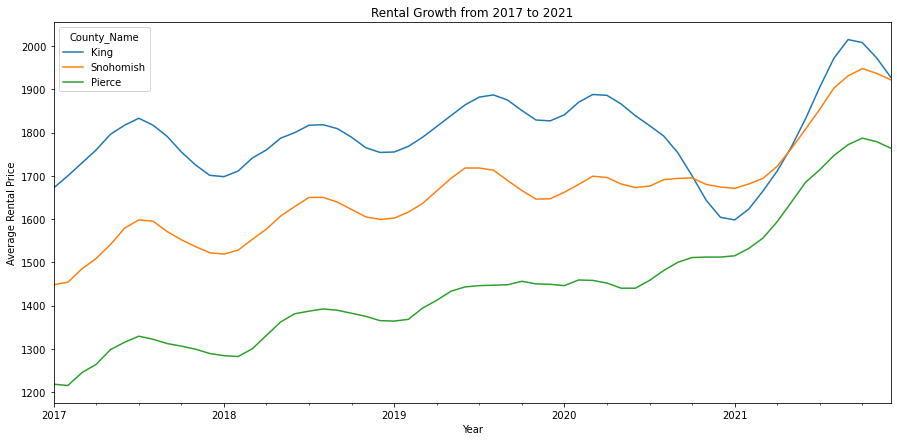

In [117]:
#Plotting the sliced dataframe for visualization 
sliced_county_rental_df.plot(
    figsize=(15,7),
    title = "Rental Growth from 2017 to 2021",
    xlabel='Year',
    ylabel='Average Rental Price'
)

##### Based on county wise analysis, it is seen that all counties have faced high rental price growth, but King county declined in 2020 whereas Pierce & Snohomish counties leveled off before strong growth in 2021. One of the reasons could be migration of people from urban to suburban and rural areas due to work from home. This lead to the increase in demand in Snohomish and Pierce counties, launching a drastic increase in rent growth. 

In [118]:
#Creating a table for the three counties for the median listing price
h_df = wa_house_listing_county_df[['Date','county_name','median_listing_price']]
h_df = pd.pivot_table(h_df,values='median_listing_price',
                     index=['Date'],
                     columns=['county_name'])
h_df = h_df[['King','Snohomish','Pierce']]
display(h_df.head())

county_name,King,Snohomish,Pierce
Date,,,
2016-07-01,565000.0,399500.0,324950.0
2016-08-01,554997.5,394975.0,322475.0
2016-09-01,549975.0,399700.0,319475.0
2016-10-01,559000.0,399995.0,315000.0
2016-11-01,550000.0,409975.0,312475.0


<AxesSubplot:title={'center':'House Price Appreciation from 2017 to 2021'}, xlabel='Year', ylabel='Median Listing Price'>

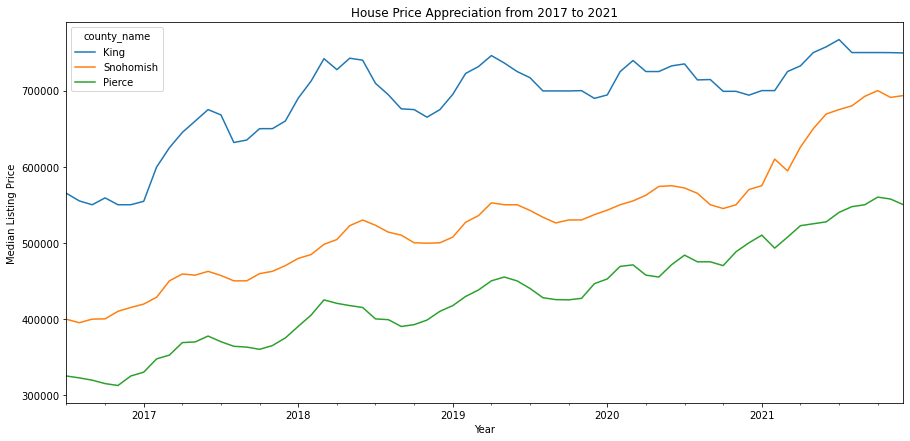

In [119]:
h_df.plot(
    figsize=(15,7),
    title = "House Price Appreciation from 2017 to 2021",
    xlabel='Year',
    ylabel='Median Listing Price'
)

##### Home prices were less responsive (than rent) to the demand shock created by job losses in 2020. Median listing price plateaued off during the first year of the pandemic but did not decline. The trends for King and Snohomish counties are pretty similar; they both show increases from 2017, then surges in 2021. In contrast, Pierce county had a small gradual increase with a small spike in 2021.

In [120]:
h2_df = wa_house_listing_county_df[['Date','county_fips','county_name','median_listing_price_per_square_foot','median_listing_price_per_square_foot_yy']]
h2_df = h2_df[h2_df['Date'] == '2021-12-01']
wa_house_listings_geo_df = pd.merge(left = h2_df, right=geocode_df, left_on='county_fips', right_on='GEOID')

# Plot data in a scatter plot using hvPlot with GeoViews enabled
wa_house_listings_geo_df.hvplot.points(
    'INTPTLONG',
    'INTPTLAT',
    geo=True,
    color= 'median_listing_price_per_square_foot_yy',
    size= 'median_listing_price_per_square_foot',
    tiles='OSM',
    scale=1.5,
    hover_cols = 'county_name',
    frame_width=700,
    frame_height=500,
    title = 'Median Price per Square Foot (size) and Year-over-Year Change (color): December 2021'
    )

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [INTPTLONG,INTPTLAT]   (median_listing_price_per_square_foot_yy,median_listing_price_per_square_foot,county_name)

##### Although home prices are generally higher in the urban areas of western Washington, price appreciation has been stronger in eastern Washington and coastal counties north and south of Seattle. Ferry county, a rural area in the Northeast corner of the state, reported the steepest home price gains at the end of 2021--almost doubling year-over-year.

## Housing Affordability Analysis

In [26]:
city_index=city_affordability_indices.reset_index()
cities = ['Seattle','Bellevue','Bothell','Everett','Kirkland','Issaquah','Snoqualmie','Yakima','Lake Stevens']  
city_index = city_index[city_index.Areas.isin(cities)].set_index('Areas')
city_index.head()

,2017,2018,2019,2020
Areas,,,,
Bellevue,66.9,63.8,73.5,74.7
Bothell,81.9,73.2,86.4,95.2
Everett,85.1,75.0,82.2,80.1
Issaquah,82.6,69.2,87.3,91.3
Kirkland,82.0,68.8,83.7,85.6


In [27]:
#Creating year wise separate dataframes for city affordability indexs plotting
df_2017 = city_index['2017'].hvplot.bar(
    legend=True,
    width=300,
    height=300,
    title='City Affordability Index',
    color="Orange").opts(invert_axes=True)
df_2018 = city_index['2018'].hvplot.bar(
    legend=True,
    width=300, height=300,
    title='City Affordability Index',
    color="Pink").opts(invert_axes=True)
df_2019 = city_index['2019'].hvplot.bar(
    legend=True,
    width=300,
    height=300,
    title='City Affordability Index',
    color="Yellow").opts(invert_axes=True)
df_2020 = city_index['2020'].hvplot.bar(
    legend=True,
    width=300,
    height=300,
    title='City Affordability Index',
    color="Turquoise").opts(invert_axes=True)

#Plotting all year dataframes side by side for better Visualization and analysis
df_2017 + df_2018 + df_2019 + df_2020

:Layout
   .Bars.A_2017 :Bars   [Areas]   (2017)
   .Bars.A_2018 :Bars   [Areas]   (2018)
   .Bars.A_2019 :Bars   [Areas]   (2019)
   .Bars.A_2020 :Bars   [Areas]   (2020)

##### The above analysis shows houses in cities like Yakima, Lake Stevens, Snoqualmie, etc., can be easily affordable in comparison to the cities like Seattle, Bellevue, etc., which are becoming unaffordable. For example, in 2017, Bellevue's index of 70.0 would indicate that the typical household only has 70% of the income required to qualify for a mortgage on a median priced house, whereas Lake Stevens index of 118.0 means that a household earning the median family income has 118% of the income required to qualify for a conventional mortgage.

## Housing Supply Analysis

In [28]:
b_df = building_completion_county_df[['Date','COUNTIES','Units_Completed']]
b_df = pd.pivot_table(b_df,values='Units_Completed',
                     index=['Date'],
                     columns=['COUNTIES'])
b_df = b_df[['King','Snohomish','Pierce']]
display(b_df.head())

COUNTIES,King,Snohomish,Pierce
Date,,,
2016/17,14810.0,3556.0,4277.0
2017/18,15104.0,4768.0,3743.0
2018/19,18851.0,4230.0,3661.0
2019/20,17182.0,4479.0,4499.0
2020/21,15261.0,5220.0,4690.0


In [29]:
#Creating a bar plot for the three counties 
b_df.hvplot.bar(
    xlabel='Year',
    ylabel='Units Completed',
    title='County Units Completed by Year',
    rot=30,    
).opts(yformatter='%.0f')

:Bars   [Date,COUNTIES]   (value)

##### The number of units completed for Snohomish and Pierce has slightly increased from 2020 whereas King had a decrease since 2019. This may have happened due to the shortage of supply related to Covid and is more visible in a central county like King with a larger market. 

# Calculating Single Family Rental Returns by County

### Monthly housing Investment yield for each county

In [30]:
# Monthly Housing Yield is `median_listing_price_per_square_foot_mm`(change in monthly median price compared to previous month)for latest month ie., `2021-12-01`
housing_yield = wa_house_listing_county_df[wa_house_listing_county_df['Date'] == '2021-12-01']
housing_yield = housing_yield[['county_fips','county_name','median_listing_price_per_square_foot_mm']]
housing_yield['percent_median_listing_price_per_square_foot_mm'] = housing_yield['median_listing_price_per_square_foot_mm'] * 100
housing_yield.head(5)

,county_fips,county_name,median_listing_price_per_square_foot_mm,percent_median_listing_price_per_square_foot_mm
2534,53001,Adams,-0.0399,-3.99
2535,53003,Asotin,0.0834,8.34
2536,53005,Benton,0.0401,4.01
2537,53007,Chelan,0.0082,0.82
2538,53009,Clallam,0.0232,2.32


### Calculating Monthly Rental Yield

Monthly Rental_Yield = ( Monthly Average Rent  / Monthly Average Listing Price ) * 100

In [31]:
# Monthly Average Rent is `Average_Rental_Price` for latest month ie., `2021-12-01`
monthly_rental_return = rental_county_df[rental_county_df['Date'] == '2021-12-01']
monthly_rental_return.head()

,Date,County_Name,FIPS_Code,Average_Rental_Price
532,2021-12-01,Clark,53011,1743.0
533,2021-12-01,Grant,53025,1094.0
534,2021-12-01,King,53033,1928.0
535,2021-12-01,Kitsap,53035,2049.0
536,2021-12-01,Pierce,53053,1764.0


In [32]:
# Monthly Average Listing Price is `average_listing_price` for latest month ie., `2021-12-01`
avg_housing_price = wa_house_listing_county_df[wa_house_listing_county_df['Date'] == '2021-12-01']
avg_housing_price = avg_housing_price[['county_fips','average_listing_price']]

In [33]:
#Calculating rental_yield using the formula `rental_yield_df[Average_Rental_Price] / rental_yield_df[average_listing_price]`

rental_yield_df = pd.merge(monthly_rental_return, avg_housing_price, left_on='FIPS_Code', right_on='county_fips')
rental_yield_df['yield'] = rental_yield_df['Average_Rental_Price'] / rental_yield_df['average_listing_price']
rental_yield_df['yield'] = rental_yield_df['yield'] * 100
rental_yield_df = rental_yield_df[['FIPS_Code','County_Name','Average_Rental_Price','average_listing_price','yield']]
rental_yield_df.head()

,FIPS_Code,County_Name,Average_Rental_Price,average_listing_price,yield
0,53011,Clark,1743.0,7.109377e+05,0.245169
1,53025,Grant,1094.0,4.532759e+05,0.241354
2,53033,King,1928.0,1.120119e+06,0.172125
3,53035,Kitsap,2049.0,7.898085e+05,0.259430
4,53053,Pierce,1764.0,6.721828e+05,0.262429


### Calculating Annualized Total Return

Annualized Total Return = ( House_Value_Monthly_Yield  + Rental_Yield ) * 12

In [34]:
# Merging Monthly housing Investment yield and Monthly Rental Yield For Each County
annualized_total_return = pd.merge(housing_yield, rental_yield_df, left_on='county_fips', right_on='FIPS_Code')
annualized_total_return = annualized_total_return[['county_name','FIPS_Code','percent_median_listing_price_per_square_foot_mm','yield']]
annualized_total_return['total_yield'] = annualized_total_return['percent_median_listing_price_per_square_foot_mm'] + annualized_total_return['yield']
annualized_total_return['annualized_total_yield'] = annualized_total_return['total_yield'] * 12
annualized_total_return = pd.merge(left=annualized_total_return, 
                       right=geocode_df,
                       left_on='FIPS_Code',
                       right_on='GEOID',
                       )
annualized_total_return = annualized_total_return[['county_name', 'FIPS_Code','total_yield',
       'annualized_total_yield', 'INTPTLAT', 'INTPTLONG']]

annualized_total_return

,county_name,FIPS_Code,total_yield,annualized_total_yield,INTPTLAT,INTPTLONG
0,Clark,53011,0.515169,6.182030,45.771730,-122.485953
1,Grant,53025,0.581354,6.976249,47.213633,-119.467788
2,King,53033,1.492125,17.905495,47.490552,-121.833977
3,Kitsap,53035,0.139430,1.673160,47.639595,-122.649634
4,Pierce,53053,2.602429,31.229143,47.051413,-122.153240
5,Snohomish,53061,1.142906,13.714871,48.054913,-121.765038
6,Spokane,53063,2.302158,27.625890,47.620375,-117.403371
7,Thurston,53067,1.991779,23.901348,46.935822,-122.830152


In [35]:
annualized_total_return.hvplot.points(
    'INTPTLONG',
    'INTPTLAT',
    geo=True,
    color= 'county_name',
    size= 'annualized_total_yield',
    tiles='OSM',
    scale=5,
    title = 'Total Yield (annualized) by County',
    xlabel = 'Latitude',
    ylabel = 'Longitude',
    hover_cols = ['county_name','yearly_total_yield'],
    )

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [INTPTLONG,INTPTLAT]   (county_name,annualized_total_yield)